In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline


In [2]:
#Q2
#Load the dataset
csv_path = '/Users/andrewfearney27/cleaned_battle_deaths.csv'
df = pd.read_csv(csv_path)

#Display the first few rows of the dataframe
print(df.head())

#Display column names
print(df.columns)


   conflict_id  dyad_id location_inc              side_a side_a_id side_a_2nd  \
0          205      406         Iran  Government of Iran       114    Unknown   
1          205      406         Iran  Government of Iran       114    Unknown   
2          205      406         Iran  Government of Iran       114    Unknown   
3          205      406         Iran  Government of Iran       114    Unknown   
4          205      406         Iran  Government of Iran       114    Unknown   

  side_b side_b_id side_b_2nd  incompatibility  ... type_of_conflict  \
0   KDPI       164    Unknown                1  ...                3   
1   KDPI       164    Unknown                1  ...                3   
2   KDPI       164    Unknown                1  ...                3   
3   KDPI       164    Unknown                1  ...                3   
4   KDPI       164    Unknown                1  ...                3   

   battle_location  gwno_a  gwno_a_2nd  gwno_b  gwno_b_2nd gwno_loc  \
0        

In [11]:
#Drop non-numerical columns for k-means clustering
df_numeric = df.select_dtypes(include=[np.number])

#Standardise the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [12]:
#Q3
#Define the range of potential clusters
num_cl = range(1, 11)
kmeans = [KMeans(n_clusters=i, n_init=10, random_state=42) for i in num_cl]

#Compute the score for each k-means model
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))]



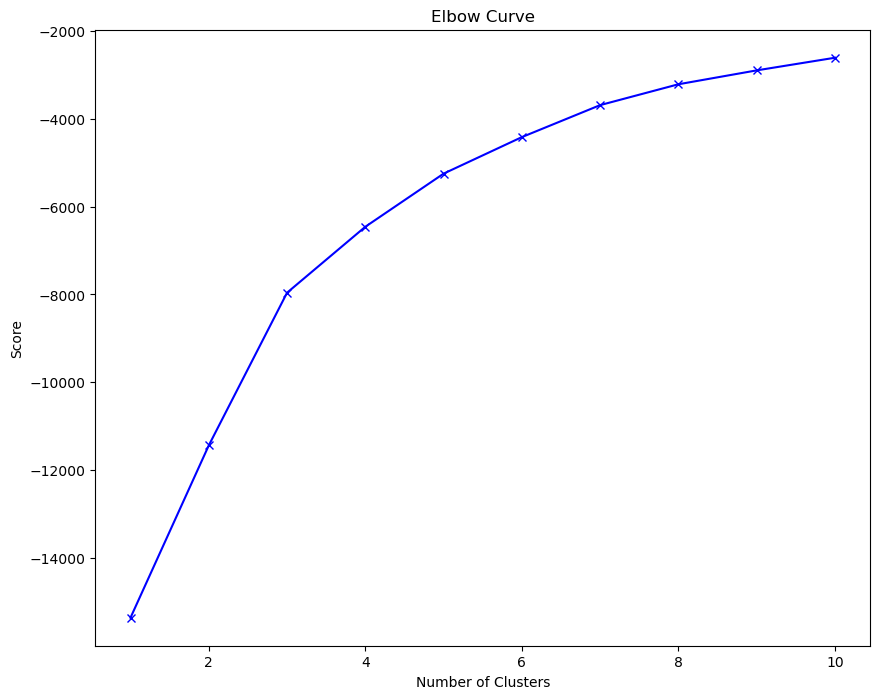

In [13]:
#Plot the elbow curve
plt.figure(figsize=(10, 8))
plt.plot(num_cl, score, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
#Q4
#I chose 3 clusters based on the elbow curve plot. 
#The curve shows a significant drop in the score up to 3 clusters, after which the rate of decrease slows down. 
#This suggests that 3 clusters is a good balance between capturing the variability in the data and avoiding overfitting.

In [14]:
#Q5
# Create the k-means object
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

In [15]:
#Fit the k-means object to the data
kmeans.fit(df_scaled)

#Attach the resulting clusters to the dataframe
df['clusters'] = kmeans.predict(df_scaled)

#Display the first few rows to verify the new column
print(df.head())


   conflict_id  dyad_id location_inc              side_a side_a_id side_a_2nd  \
0          205      406         Iran  Government of Iran       114    Unknown   
1          205      406         Iran  Government of Iran       114    Unknown   
2          205      406         Iran  Government of Iran       114    Unknown   
3          205      406         Iran  Government of Iran       114    Unknown   
4          205      406         Iran  Government of Iran       114    Unknown   

  side_b side_b_id side_b_2nd  incompatibility  ... battle_location  gwno_a  \
0   KDPI       164    Unknown                1  ...            Iran     630   
1   KDPI       164    Unknown                1  ...      Iran, Iraq     630   
2   KDPI       164    Unknown                1  ...      Iran, Iraq     630   
3   KDPI       164    Unknown                1  ...      Iran, Iraq     630   
4   KDPI       164    Unknown                1  ...      Iran, Iraq     630   

   gwno_a_2nd  gwno_b  gwno_b_2nd  gwn

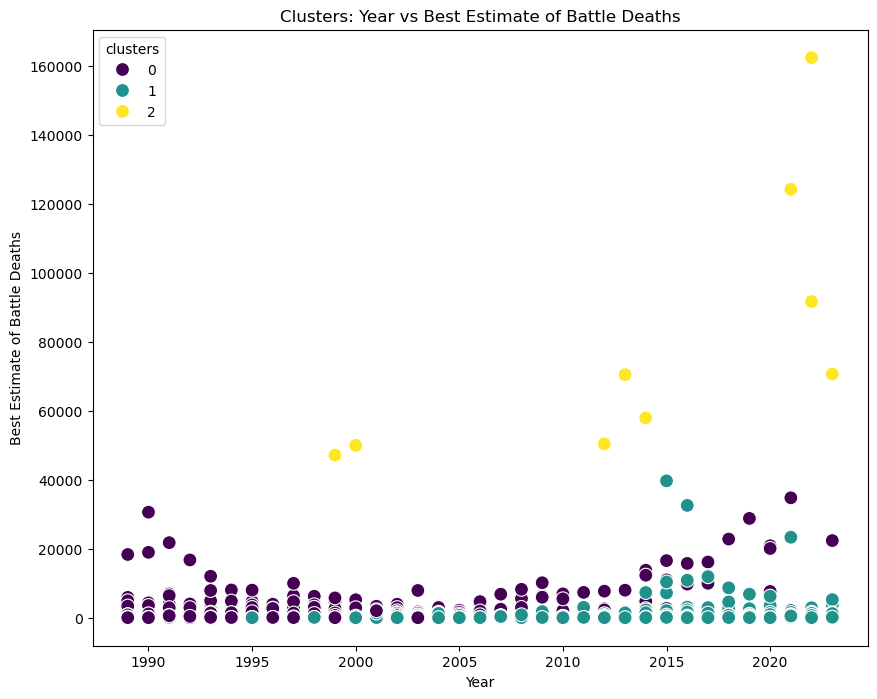

In [16]:
#Q6
#Plot the clusters for two variables
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['year'], y=df['bd_best'], hue=df['clusters'], palette='viridis', s=100)
plt.title('Clusters: Year vs Best Estimate of Battle Deaths')
plt.xlabel('Year')
plt.ylabel('Best Estimate of Battle Deaths')
plt.show()

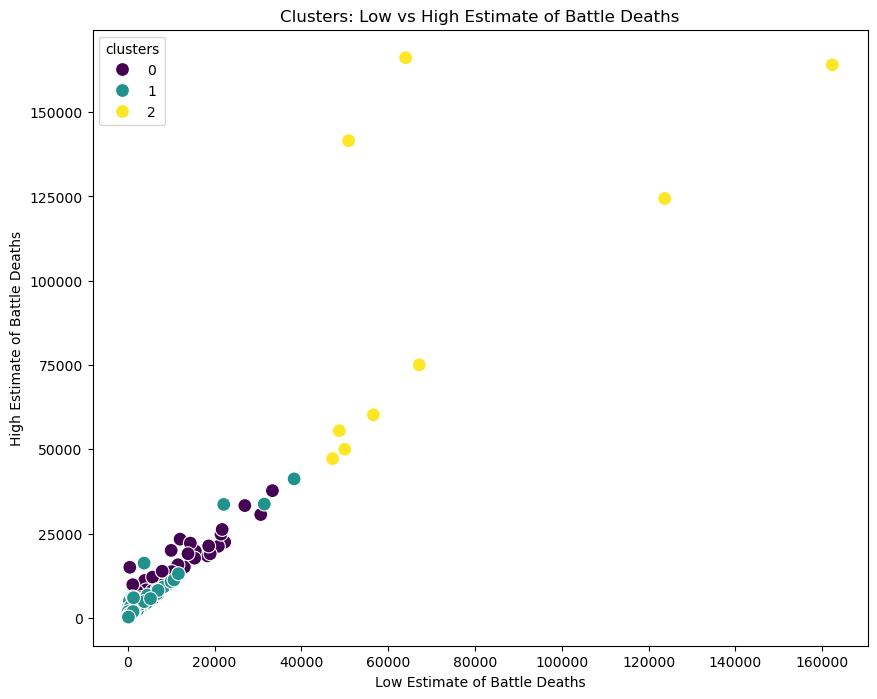

In [17]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['bd_low'], y=df['bd_high'], hue=df['clusters'], palette='viridis', s=100)
plt.title('Clusters: Low vs High Estimate of Battle Deaths')
plt.xlabel('Low Estimate of Battle Deaths')
plt.ylabel('High Estimate of Battle Deaths')
plt.show()

In [ ]:
#Q7
#I can now try plotting: Year vs. High Estimate of Battle Deaths

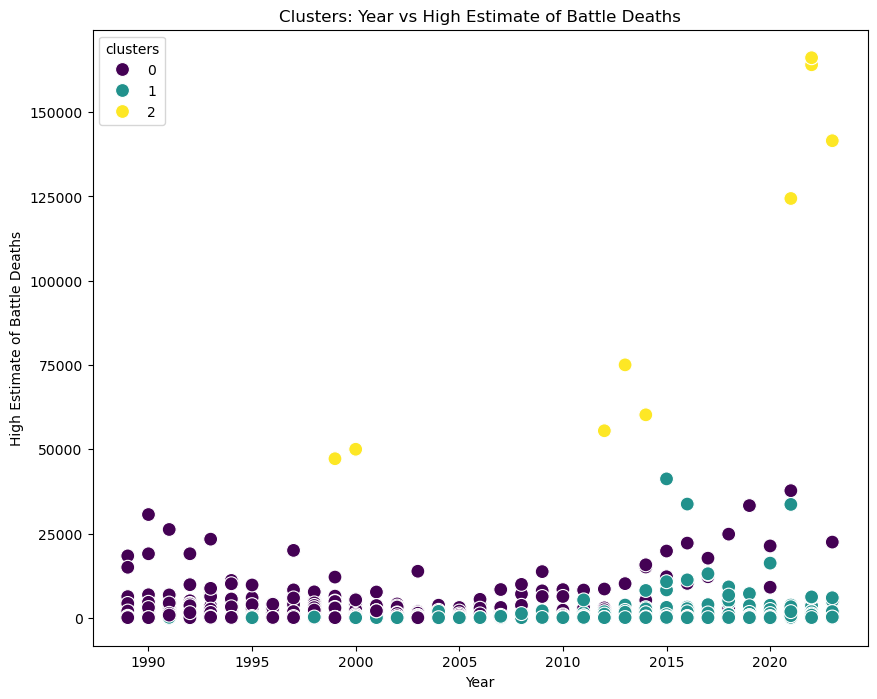

In [20]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['year'], y=df['bd_high'], hue=df['clusters'], palette='viridis', s=100)
plt.title('Clusters: Year vs High Estimate of Battle Deaths')
plt.xlabel('Year')
plt.ylabel('High Estimate of Battle Deaths')
plt.show()

In [ ]:
#I can also plot Year vs Low Estimate of Battle Deaths

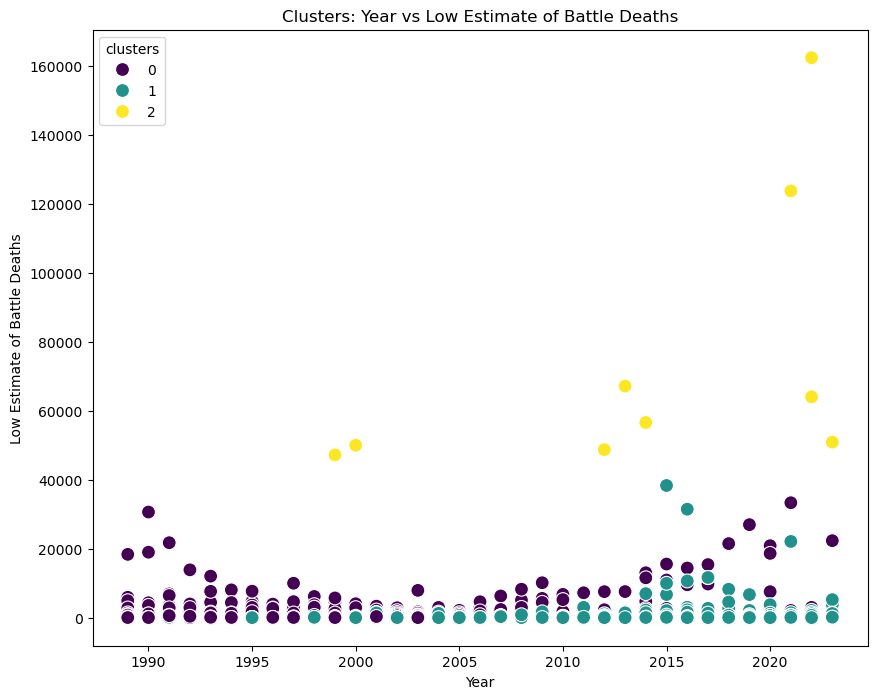

In [21]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['year'], y=df['bd_low'], hue=df['clusters'], palette='viridis', s=100)
plt.title('Clusters: Year vs Low Estimate of Battle Deaths')
plt.xlabel('Year')
plt.ylabel('Low Estimate of Battle Deaths')
plt.show()


In [23]:
#Q8
#The k-means algorithm identified three clusters in the battle deaths data:

#1. Cluster 0 (Purple):
   #- Mostly consists of conflicts with low to moderate estimates of battle deaths.
   #- Represents smaller-scale conflicts with fewer casualties.

#2. Cluster 1 (Green):
   #- Contains conflicts with moderate estimates of battle deaths.
   #- Likely medium-intensity conflicts with higher casualties than Cluster 0.

#3. Cluster 2 (Yellow):
   #- Includes conflicts with the highest estimates of battle deaths, particularly around 2000 and post-2010.
   #- Represents major wars or intense periods of fighting with significant casualties.

#Analysis

#Cluster 0 (Purple)**: Lower-intensity conflicts.
#Cluster 1 (Green)**: Medium-intensity conflicts.
#Cluster 2 (Yellow)**: High-intensity conflicts.

#The clusters make sense as they categorise conflicts based on casualty estimates, which align with known conflict intensity levels. 

In [25]:
#Q9
# Calculate descriptive statistics for each cluster
cluster_stats = df.groupby('clusters').agg({
    'bd_best': ['mean', 'median'],
    'bd_low': ['mean', 'median'],
    'bd_high': ['mean', 'median'],
    'year': ['mean', 'median']
})

#Display the statistics
cluster_stats

bd_best                 bd_low                bd_high           \
                  mean   median          mean   median          mean   median   
clusters                                                                        
0           816.196189    134.0    776.382498    127.0   1082.152435    194.0   
1           698.491903     96.5    653.184211     91.5    927.244939    138.0   
2         80577.000000  70513.0  74507.000000  56583.0  98223.888889  75030.0   

                 year          
                 mean  median  
clusters                       
0         2002.465067  2001.0  
1         2017.285425  2018.0  
2         2014.000000  2014.0

In [ ]:
#Q10: Future Usefulness of Results
#The clustering results can be useful for:

#Conflict Intensity Analysis: Identifying varying levels of conflict intensity based on casualty estimates.
#Resource Allocation: Guiding the efficient distribution of humanitarian aid and peacekeeping efforts.
#Predictive Modeling: Forming the basis for predicting future conflicts and proactive measures.
#Policy Formulation: Informing targeted policies for conflict prevention and resolution.
#Historical Analysis: Understanding historical trends and factors contributing to conflicts.
#Early Warning Systems: Integrating into systems to monitor and provide alerts on emerging conflicts.
